In [ ]:
!wget https://raw.githubusercontent.com/DeepConnectAI/challenge-week-1/master/data/structured_data/data.csv

--2020-08-18 11:19:41--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-1/master/data/structured_data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473 [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]     473  --.-KB/s    in 0s      

2020-08-18 11:19:41 (13.0 MB/s) - ‘data.csv’ saved [473/473]



In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
data=pd.read_csv("data.csv")

In [ ]:
data.isnull().sum()

Country                       0
Age                           2
Salary                        3
Purchased                     0
Price Category Of Purchase    0
dtype: int64

In [ ]:
data['Age']=data['Age'].replace(np.NaN,data['Age'].mean())

In [ ]:
data['Salary']=data['Salary'].replace(np.NaN,data['Salary'].mean())

In [ ]:
data.head(10)

,Country,Age,Salary,Purchased,Price Category Of Purchase
0,France,44.000000,72000.000000,No,1
1,Spain,27.000000,48000.000000,Yes,1
2,Germany,30.000000,54000.000000,No,2
3,Spain,38.000000,61000.000000,No,3
4,Germany,40.000000,60364.705882,Yes,1
5,France,35.000000,58000.000000,Yes,2
6,Spain,34.222222,52000.000000,No,3
7,France,48.000000,79000.000000,Yes,1
8,Germany,50.000000,83000.000000,No,2
9,France,37.000000,67000.000000,Yes,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
country_integer_encoded = label_encoder.fit_transform(np.array(data['Country']))
purchased_integer_encoded=label_encoder.fit_transform(np.array(data['Purchased']))
print(country_integer_encoded)
print(purchased_integer_encoded)

[0 2 1 2 1 0 2 0 1 0 0 1 1 0 0 1 1 1 0 1]
[0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0]


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
country_integer_encoded = country_integer_encoded.reshape(len(country_integer_encoded), 1)
purchased_integer_encoded = purchased_integer_encoded.reshape(len(purchased_integer_encoded), 1)
country_onehot_encoded = onehot_encoder.fit_transform(country_integer_encoded)
purchased_onehot_encoded = onehot_encoder.fit_transform(purchased_integer_encoded)

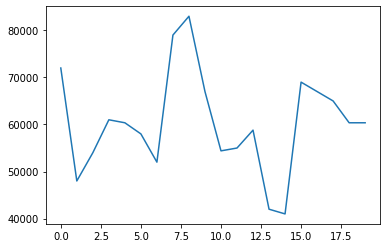

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(data['Salary']))
plt.show()

In [ ]:
data = pd.concat([data,pd.get_dummies(data['Country'], prefix='Country')],axis=1).drop(['Country'],axis=1)

In [ ]:
data=pd.concat([data,pd.get_dummies(data['Purchased'],prefix='Purchased',)],axis=1).drop(['Purchased'],axis=1)

In [ ]:
data=pd.concat([data,pd.get_dummies(data['Price Category Of Purchase'],prefix='Price_Category',)],axis=1).drop(['Price Category Of Purchase'],axis=1)

In [ ]:
data

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes,Price_Category_1,Price_Category_2,Price_Category_3
0,44.000000,72000.000000,1,0,0,1,0,1,0,0
1,27.000000,48000.000000,0,0,1,0,1,1,0,0
2,30.000000,54000.000000,0,1,0,1,0,0,1,0
3,38.000000,61000.000000,0,0,1,1,0,0,0,1
4,40.000000,60364.705882,0,1,0,0,1,1,0,0
5,35.000000,58000.000000,1,0,0,0,1,0,1,0
6,34.222222,52000.000000,0,0,1,1,0,0,0,1
7,48.000000,79000.000000,1,0,0,0,1,1,0,0
8,50.000000,83000.000000,0,1,0,1,0,0,1,0
9,37.000000,67000.000000,1,0,0,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data[:2])
data_scaled

array([[1., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

In [ ]:
!git clone https://github.com/DeepConnectAI/challenge-week-1.git

Cloning into 'challenge-week-1'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 143 (delta 41), reused 43 (delta 13), pack-reused 42
Receiving objects: 100% (143/143), 223.33 MiB | 43.99 MiB/s, done.
Resolving deltas: 100% (44/44), done.


10.jpeg


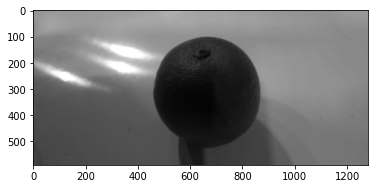

18.jpeg


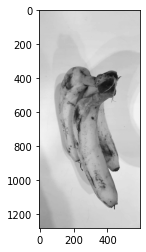

13.jpeg


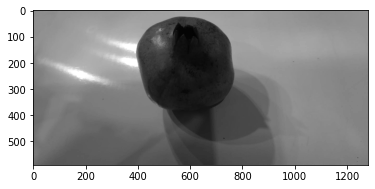

6.jpeg


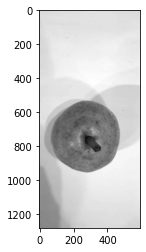

1.jpeg


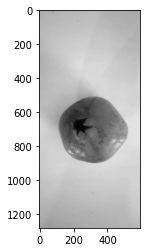

9.jpeg
Dimension of 12.jpeg (590, 1280, 3)


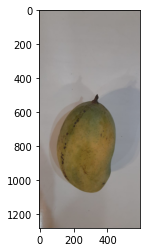

In [ ]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from numpy import asarray

i=0

for img in os.listdir(path='challenge-week-1/data/rgb_images/'):
  image=Image.open(os.path.join('challenge-week-1/data/rgb_images/',img))
  image_data=asarray(image)

  if(i<5):
    i+=1
    print(img)
    grey_image=cv2.imread(os.path.join('challenge-week-1/data/rgb_images/',img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(grey_image,cmap='gray')
    plt.show()

  if(img=='9.jpeg'):
    print(img)
    plt.imshow(image)
  elif(img=='12.jpeg'):
    print("Dimension of 12.jpeg",image_data.shape)


In [ ]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 68.8MB/s 


In [ ]:
import pydicom
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
files=os.listdir('challenge-week-1/data/dicom_images')
print(files)


['0002.DCM', '0009.DCM', '0003.DCM', '0004.DCM']


In [ ]:
dimg=pydicom.dcmread('challenge-week-1/data/dicom_images/0002.DCM')
dimg


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 150
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0008, 0020) Study Date                          DA: '19941013'
(0008, 0030) Study Time                          TM: '141917'
(0008, 0050) Accession Number         

In [ ]:
dimg.pixel_array[0,:,:]

for i in range(dimg.pixel_array.shape[0]):
  dicom_img=dimg.pixel_array[i,:,:]
  plt.imshow(dicom_img,cmap=plt.cm.bone)
  plt.show()

In [ ]:
videos=os.listdir('challenge-week-1/data/videos')
print(videos)


['VID_13.mp4', 'VID_4.mp4', 'VID_9.mp4', 'VID_11.mp4', 'VID_12.mp4', 'VID_5.mp4', 'VID_2.mp4', 'VID_7.mp4', 'VID_10.mp4', 'VID_6.mp4', 'VID_14.mp4', 'VID_1.mp4', 'VID_3.mp4', 'VID_8.mp4']


In [ ]:
z=0
for i in videos:
  cap=cv2.VideoCapture(os.path.join('challenge-week-1/data/videos/',i))
  print(cap)
  y = 0
    # a variable to set how many frames you want to skip
  frame_skip = 10
  while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if y > frame_skip - 1:
            # cv2.imwrite('test_'+str(z)+'.jpg', frame)
            z+=1
            continue
        y += 1

  cap.release()
  print('done')
  cv2.destroyAllWindows()

<VideoCapture 0x7f164a81a830>
done
<VideoCapture 0x7f1653954270>
done
<VideoCapture 0x7f164a81a6b0>
done
<VideoCapture 0x7f164a81a830>
done
<VideoCapture 0x7f1653954270>
done
<VideoCapture 0x7f164a81a6d0>
done
<VideoCapture 0x7f1653954270>
done
<VideoCapture 0x7f164a81a6b0>
done
<VideoCapture 0x7f164a81a730>
done
<VideoCapture 0x7f1653954270>
done
<VideoCapture 0x7f164a81a830>
done
<VideoCapture 0x7f164a81a6b0>
done
<VideoCapture 0x7f164a81a730>
done
<VideoCapture 0x7f164a81a830>
done


In [ ]:
vid=cv2.VideoCapture('challenge-week-1/data/videos/VID_2.mp4')
vid.set(1,4)
print(vid.read())

(True, array([[[15, 11, 12],
        [15, 11, 12],
        [15, 11, 12],
        ...,
        [39, 51, 42],
        [35, 47, 38],
        [30, 42, 33]],

       [[15, 11, 12],
        [15, 11, 12],
        [15, 11, 12],
        ...,
        [40, 52, 43],
        [36, 48, 39],
        [31, 43, 34]],

       [[15, 11, 12],
        [15, 11, 12],
        [15, 11, 12],
        ...,
        [41, 53, 44],
        [38, 50, 41],
        [33, 45, 36]],

       ...,

       [[15, 11, 10],
        [15, 11, 10],
        [15, 11, 10],
        ...,
        [27, 33, 26],
        [26, 32, 25],
        [27, 33, 26]],

       [[14, 10,  9],
        [14, 10,  9],
        [14, 10,  9],
        ...,
        [28, 34, 27],
        [31, 37, 30],
        [34, 40, 33]],

       [[14, 10,  9],
        [14, 10,  9],
        [14, 10,  9],
        ...,
        [29, 35, 28],
        [31, 37, 30],
        [35, 41, 34]]], dtype=uint8))
